<a href="https://colab.research.google.com/github/brit228/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [2]:
!apt-get update && apt-get install ffmpeg

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [119 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [262 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [56

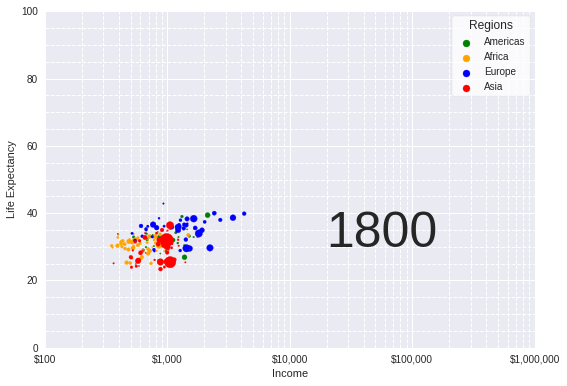

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import math

reg_col = {
    'americas': 'green',
    'africa': 'orange',
    'europe': 'blue',
    'asia': 'red'
}

df1 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--total_population_with_projections--by--geo--time.csv")

df = df1.join(df2.join(df3.set_index("country")[["world_4region", "iso3166_1_alpha3", "gapminder_list"]], on="geo", how="inner").set_index(['geo','time']), on=['geo','time'], how="inner").join(df4.set_index(['geo','time']), on=['geo','time'], how='left')
df["total_population_with_projections"] = df["total_population_with_projections"].fillna(method="ffill")
df_l = list(df.groupby("time"))

#plt.style.use('fivethirtyeight')
fig = plt.figure()
ax = fig.add_subplot(111)

year = ax.text(20000, 30, "1800", fontsize=50)
ax.set_xscale('log')
ax.set_xlim(100.0, 1000000.0)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.set_ylim(0.0, 100.0)
ax.set_xlabel("Income")
ax.set_ylabel("Life Expectancy")
ax.yaxis.set_minor_locator(mtick.MultipleLocator(5))
ax.grid(b=True, which='minor', linestyle='--', axis='both')

plt.subplots_adjust(left=0.1, right=0.95,  bottom=0.1, top=0.95)

l = []
for r in ['americas', 'africa', 'europe', 'asia']:
  d_y = df_l[0][1]
  l.append(ax.scatter(d_y[d_y['world_4region'] == r]["income_per_person_gdppercapita_ppp_inflation_adjusted"], d_y[d_y['world_4region'] == r]["life_expectancy_years"], c=reg_col[r], label=r.capitalize()))
  
ax.legend(l, ['Americas', 'Africa', 'Europe', 'Asia'], title="Regions", frameon=True, facecolor='white')

def update_img(n):
    year.set_text(str(n[0]))
    d_y = n[1]
    i = 0
    for r in ['americas', 'africa', 'europe', 'asia']:
      l[i].remove
      values = d_y[d_y['world_4region'] == r][["income_per_person_gdppercapita_ppp_inflation_adjusted", "life_expectancy_years"]]
      popu = d_y[d_y['world_4region'] == r]["total_population_with_projections"]
      popu = popu.apply(lambda x: math.sqrt(x) / 100.0)
      l[i].set_offsets(values)
      l[i].set_sizes(popu)
      i += 1
    return (ax, )
    
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
ani = animation.FuncAnimation(fig, update_img, frames=df_l)
HTML(ani.to_html5_video())

In [5]:
import IPython
from plotly.offline import init_notebook_mode
display(IPython.core.display.HTML('''
      <script src="/static/components/requirejs/require.js"></script>
'''))
init_notebook_mode(connected=False)

import plotly.plotly as py
from plotly.offline import iplot

t_vals = [100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
rgb = [[0, 0, 255], [255, 0, 0]]

def lerp(n, a):
  vals = []
  n1 = n[0]
  n2 = n[1]
  for i in range(len(n1)):
    vals.append(int(n1[i] + (n2[i] - n1[i]) * a))
  return vals

data = [{
    "type": 'choropleth',
    "locations": list(df_l[0][1]["iso3166_1_alpha3"].apply(lambda x: x.upper()).values[:2]),
    "z": [2.0, 6.0],
    "text": list(df_l[0][1]["gapminder_list"].values[:2]),
    "colorscale": [[t_vals[0]/t_vals[len(t_vals) - t - 1], "rgb({n[0]},{n[1]},{n[2]})".format(n=lerp(rgb, t / (len(t_vals)-1)))] for t in range(len(t_vals))],
    "autocolorscale": False,
    "reversescale": False,
    "marker": {
        "line": {
            "color": 'rgb(180,180,180)',
            "width": 0.5
        }},
    "colorbar": {
        "tickprefix": '$',
        "title": 'Adjusted Income per Capita',
        'tick0': 0,
        'tickmode': 'array',
        'tickvals': [math.log10(t) for t in t_vals],
        'ticktext': ["${}".format(t) for t in t_vals]
    }
}]

frames = []
for n in df_l:
  frames.append({"name": str(n[0]),
                 "data": [{
        "type": 'choropleth',
        "locations": list(n[1]["iso3166_1_alpha3"].apply(lambda x: x.upper()).values),
        "z": list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].apply(lambda x: math.log10(x)).values),
        "text": ["{}: ${:,}".format(list(n[1]["gapminder_list"].values)[i], list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values)[i]) for i in range(len(list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values)))],
        "colorscale": [[t_vals[0]/t_vals[len(t_vals) - t - 1], "rgb({n[0]},{n[1]},{n[2]})".format(n=lerp(rgb, t / (len(t_vals)-1)))] for t in range(len(t_vals))],
        "hoverinfo": "location+text",
        "autocolorscale": False,
        "reversescale": False,
        "marker": {
            "line": {
                "color": 'rgb(180,180,180)',
                "width": 0.5
            }},
        "colorbar": {
            "tickprefix": '$',
            "title": 'Adjusted Income per Capita',
            'tick0': 0,
            'tickmode': 'array',
            'tickvals': [math.log10(t) for t in t_vals],
            'ticktext': ["${}".format(t) for t in t_vals]            
        }}]})

layout = {
    "title": 'Income per Capita from 1800 to 2017',
    "geo": {
        "showframe": False,
        "showcoastlines": True,
        "projection": {
            "type": 'Mercator'
        }
    },
    "sliders": [{
      'active': 0,
      'yanchor': 'top',
      'xanchor': 'left',
      'currentvalue': {
          'font': {'size': 20},
          'prefix': 'Year:\t',
          'visible': True,
          'xanchor': 'right'
      },
      'transition': {'duration': 0, 'mode': 'immediate'},
      'pad': {'b': 10, 't': 50},
      'len': 0.9,
      'x': 0.1,
      'y': 0,
      'steps': [{'args': [
        [n[0]],
        {'frame': {'duration': 0, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 0}}
     ],
     'label': str(n[0]),
     'method': 'animate'} for n in df_l]
    }]
}

fig = {"data": data, "frames": frames, "layout": layout}
iplot(fig, show_link=False)

In [0]:
t_vals = [100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
rgb = [[0, 0, 255], [255, 0, 0]]

def lerp(n, a):
  vals = []
  n1 = n[0]
  n2 = n[1]
  for i in range(len(n1)):
    vals.append(int(n1[i] + (n2[i] - n1[i]) * a))
  return vals

data = [{
    "type": 'choropleth',
    "locations": list(df_l[0][1]["iso3166_1_alpha3"].apply(lambda x: x.upper()).values[:2]),
    "z": [2.0, 6.0],
    "text": list(df_l[0][1]["gapminder_list"].values[:2]),
    "colorscale": [[t_vals[0]/t_vals[len(t_vals) - t - 1], "rgb({n[0]},{n[1]},{n[2]})".format(n=lerp(rgb, t / (len(t_vals)-1)))] for t in range(len(t_vals))],
    "autocolorscale": False,
    "reversescale": False,
    "marker": {
        "line": {
            "color": 'rgb(180,180,180)',
            "width": 0.5
        }},
    "colorbar": {
        "tickprefix": '$',
        "title": 'Adjusted Income per Capita',
        'tick0': 0,
        'tickmode': 'array',
        'tickvals': [math.log10(t) for t in t_vals],
        'ticktext': ["${}".format(t) for t in t_vals]
    }
}]

frames = []
for n in df_l:
  frames.append({"name": str(n[0]),
                 "data": [{
        "type": 'choropleth',
        "locations": list(n[1]["iso3166_1_alpha3"].apply(lambda x: x.upper()).values),
        "z": list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].apply(lambda x: math.log10(x)).values),
        "text": ["{}: ${:,}".format(list(n[1]["gapminder_list"].values)[i], list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values)[i]) for i in range(len(list(n[1]["income_per_person_gdppercapita_ppp_inflation_adjusted"].values)))],
        "colorscale": [[t_vals[0]/t_vals[len(t_vals) - t - 1], "rgb({n[0]},{n[1]},{n[2]})".format(n=lerp(rgb, t / (len(t_vals)-1)))] for t in range(len(t_vals))],
        "hoverinfo": "location+text",
        "autocolorscale": False,
        "reversescale": False,
        "marker": {
            "line": {
                "color": 'rgb(180,180,180)',
                "width": 0.5
            }},
        "colorbar": {
            "tickprefix": '$',
            "title": 'Adjusted Income per Capita',
            'tick0': 0,
            'tickmode': 'array',
            'tickvals': [math.log10(t) for t in t_vals],
            'ticktext': ["${}".format(t) for t in t_vals]            
        }}]})

layout = {
    "title": 'Income per Capita from 1800 to 2017',
    "geo": {
        "showframe": False,
        "showcoastlines": True,
        "projection": {
            "type": 'Mercator'
        }
    },
    "sliders": [{
      'active': 0,
      'yanchor': 'top',
      'xanchor': 'left',
      'currentvalue': {
          'font': {'size': 20},
          'prefix': 'Year:\t',
          'visible': True,
          'xanchor': 'right'
      },
      'transition': {'duration': 0, 'mode': 'immediate'},
      'pad': {'b': 10, 't': 50},
      'len': 0.9,
      'x': 0.1,
      'y': 0,
      'steps': [{'args': [
        [n[0]],
        {'frame': {'duration': 0, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 0}}
     ],
     'label': str(n[0]),
     'method': 'animate'} for n in df_l]
    }]
}

fig = {"data": data, "frames": frames, "layout": layout}
iplot(fig, show_link=False)